# Ford GoBike System Dataset Analysis
## by Ajani Ayooluwa

## Investigation Overview
> In this investigation, I wanted to take a look at how customer type, gender, age and start time affect the duration of the trip.


## Dataset Overview
> The dataset consists of information regarding the rides made in a bike-sharing system covering the greater San Francisco Bay area for the month of february in the year 2019. The dataset features include the duration of the trip, the time at which the trip started, the time at which the trip ended, the name of the station at which the passengers embarked and much more.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams['figure.dpi'] = 400  # to improve image quality

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
ride_data = pd.read_csv('./cleaned_trip_data.csv')

ride_data['start_time'] = pd.to_datetime(ride_data['start_time'])
ride_data['end_time'] = pd.to_datetime(ride_data['end_time'])

## Average Trip Duration
> Most trips are a less than 30 minutes long, having a peak at 500 seconds implying that the riders mostly use the bikes to cover relatively short distances.

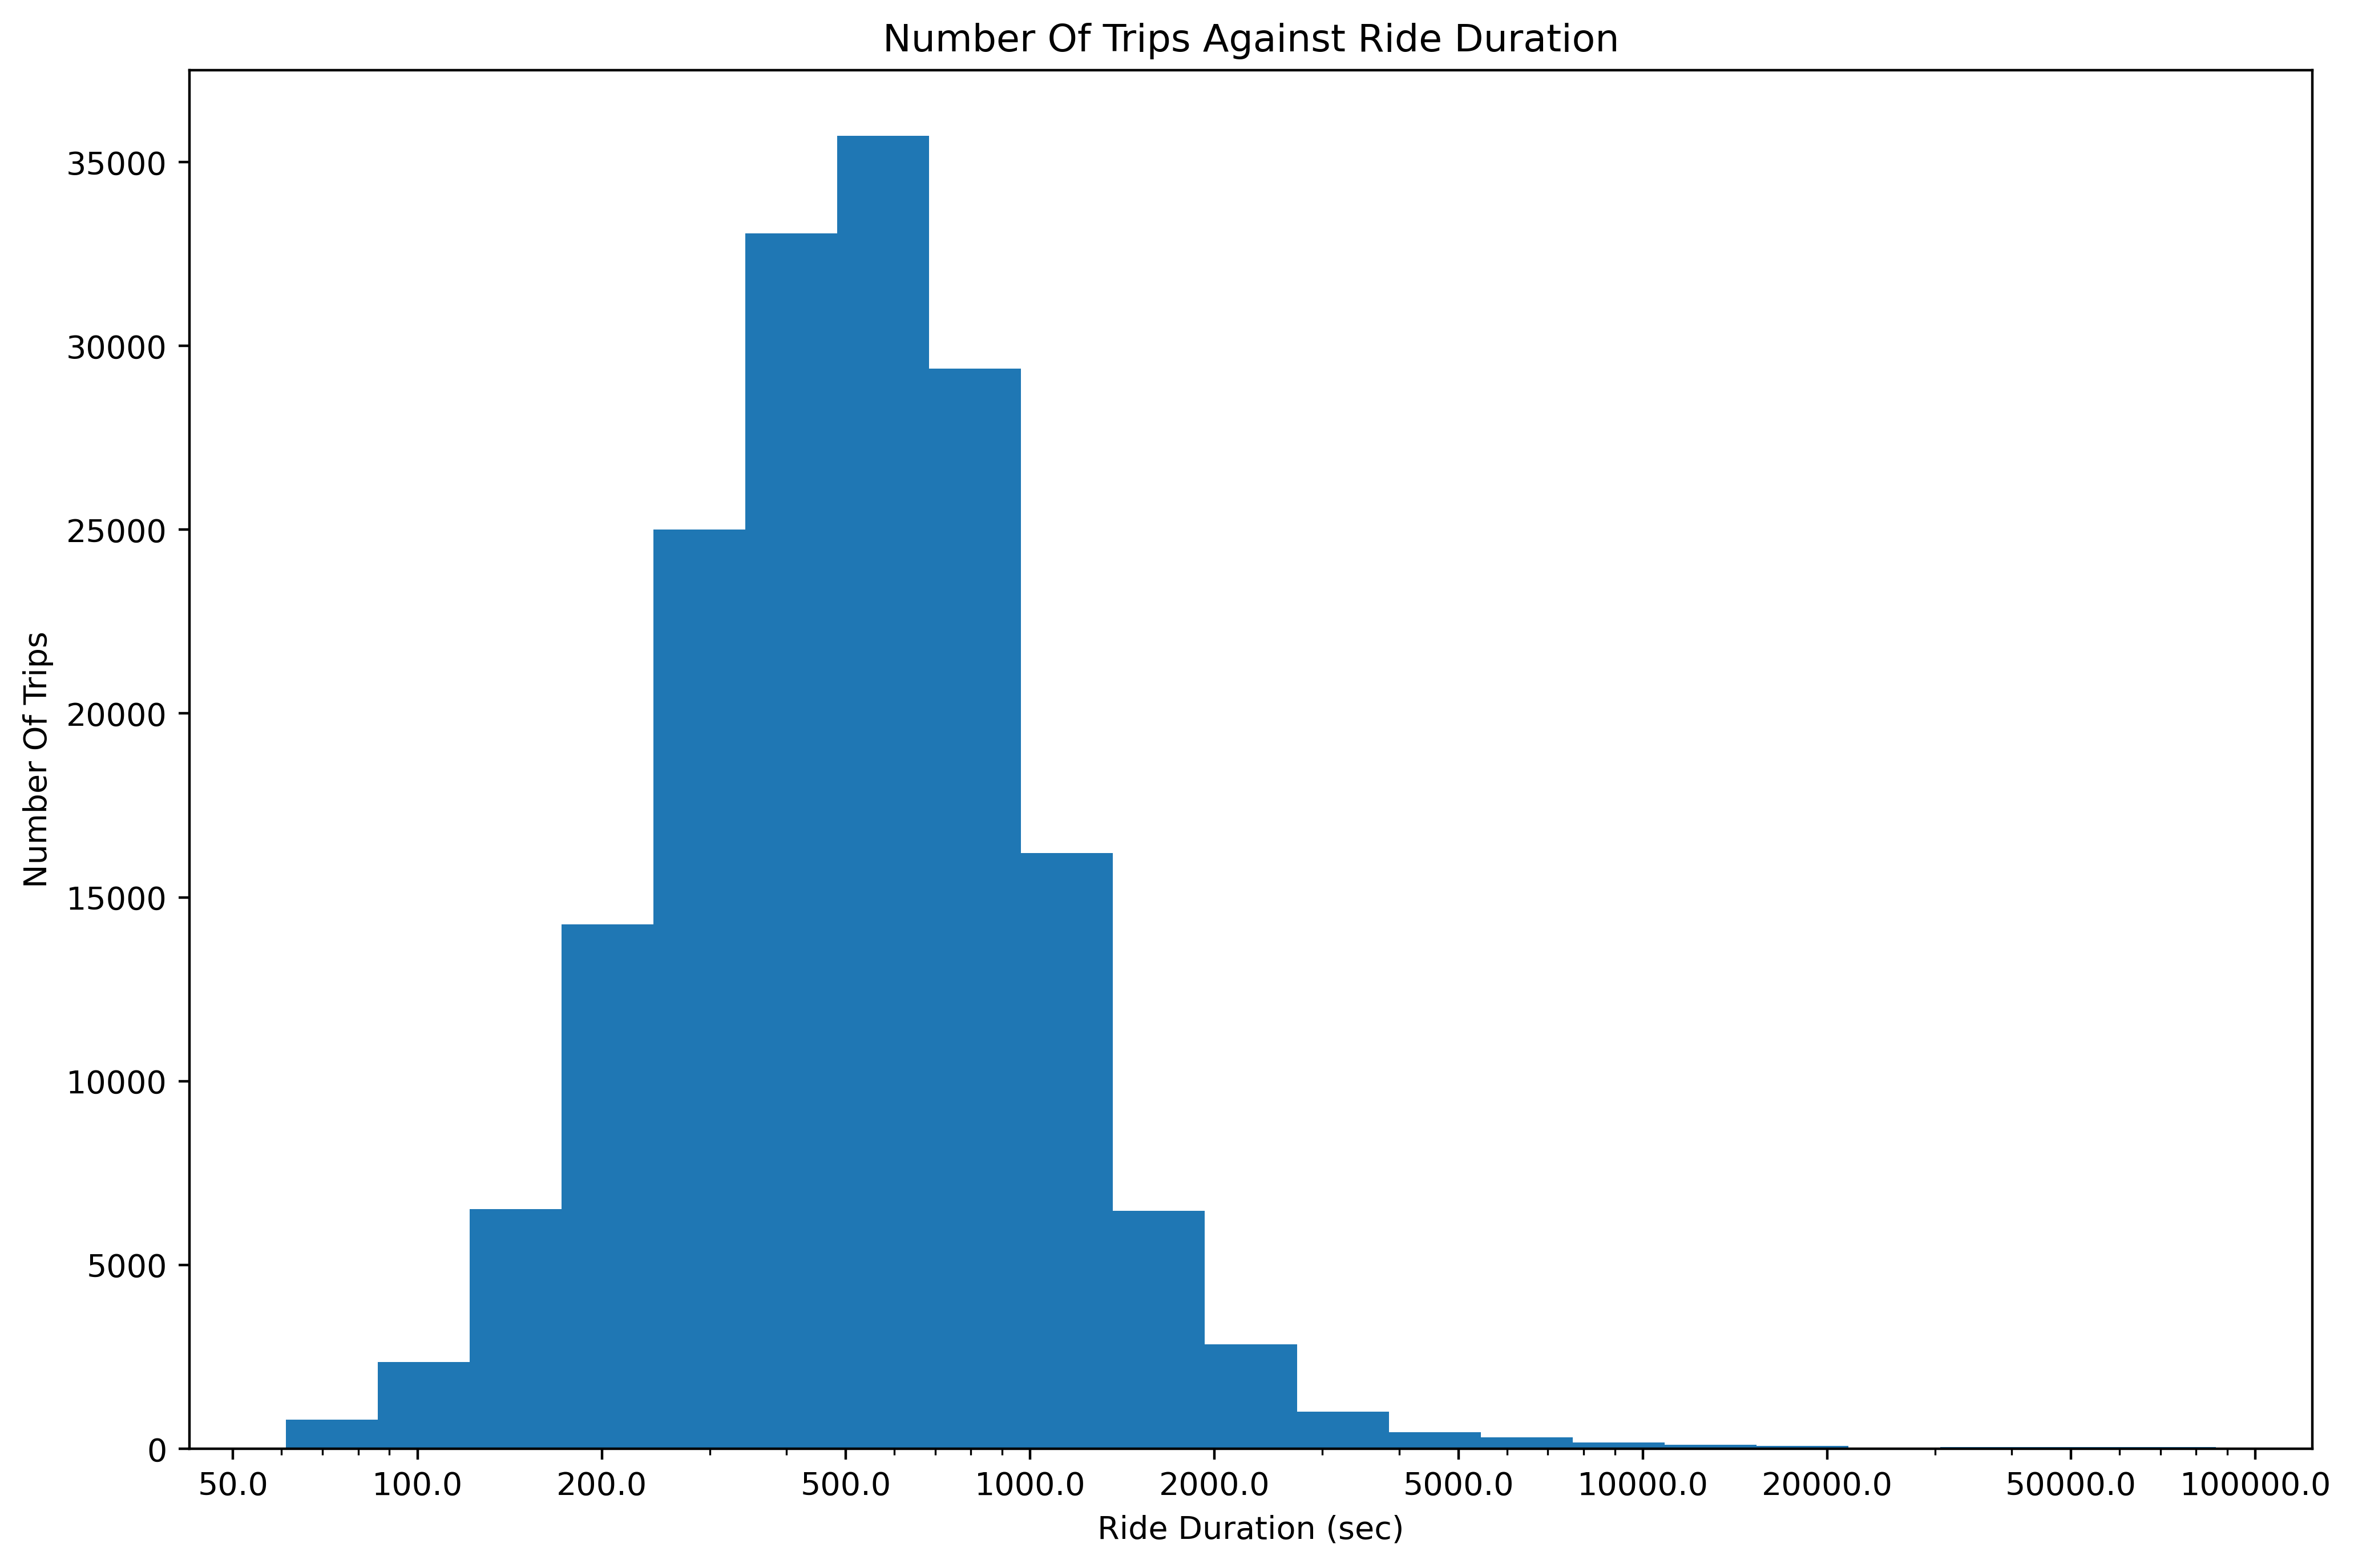

In [3]:
## Creating the bin edges
Ride = ride_data['duration_sec']
minimum_edge, maximum_edge, bin_size = np.log10(Ride.min()), np.log10(Ride.max()), 0.15
bin_edges = 10 ** np.arange(minimum_edge, maximum_edge+bin_size, bin_size)
xticks = [5e1,1e2, 2e2, 5e2, 1e3, 2e3, 5e3, 1e4, 2e4, 5e4, 1e5]

ride_data['duration_sec'].hist(grid=False, bins=bin_edges)
plt.xscale('log')  ## Performing logarithmic axis transformation
plt.xticks(xticks, xticks)
plt.xlabel("Ride Duration (sec)")
plt.ylabel("Number Of Trips")
plt.title("Number Of Trips Against Ride Duration");

## Age of Members
> A majority of riders are between 18 and 50 years, having the most riders within the ages 27 and 33.

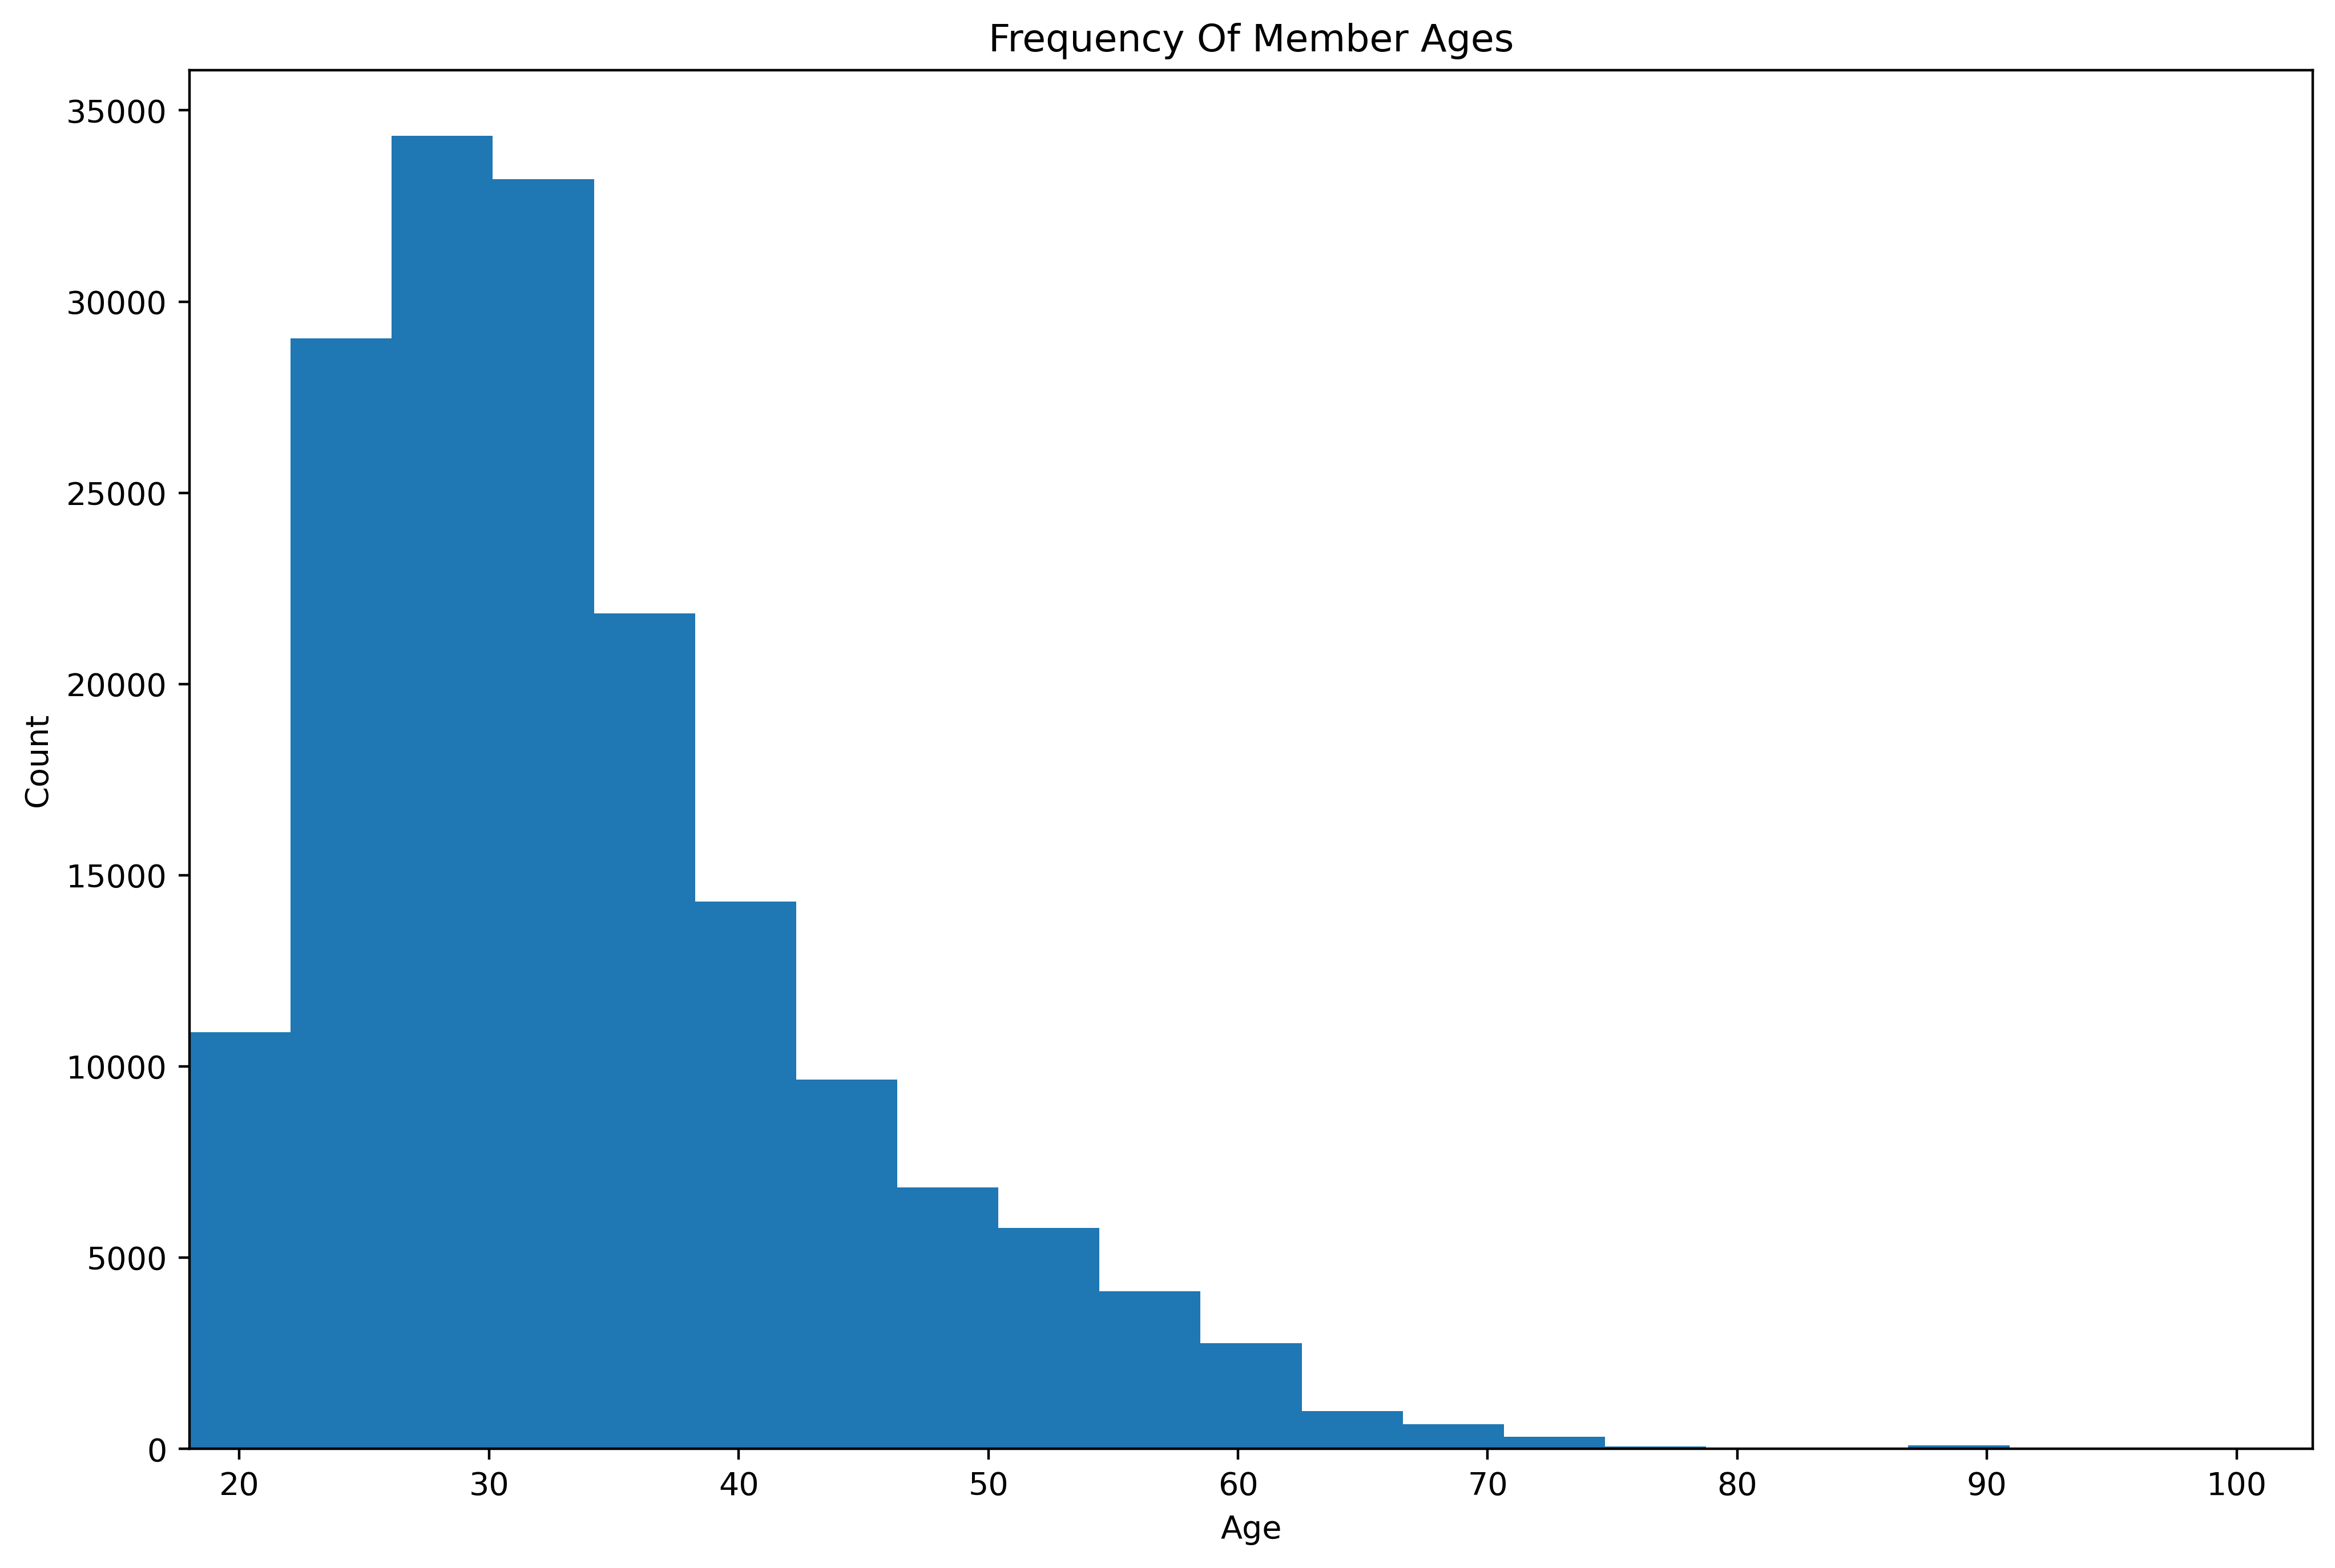

In [4]:
ride_data.age.hist(grid=False, bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Frequency Of Member Ages')
plt.xlim(left = 18);

## Trips Taken Per Day

> Most trips were taken on Thursdays and Tuesdays while the Weekends as expected have the least number of trips this maybe be due to fact that most people being spend the weekend resting at home.

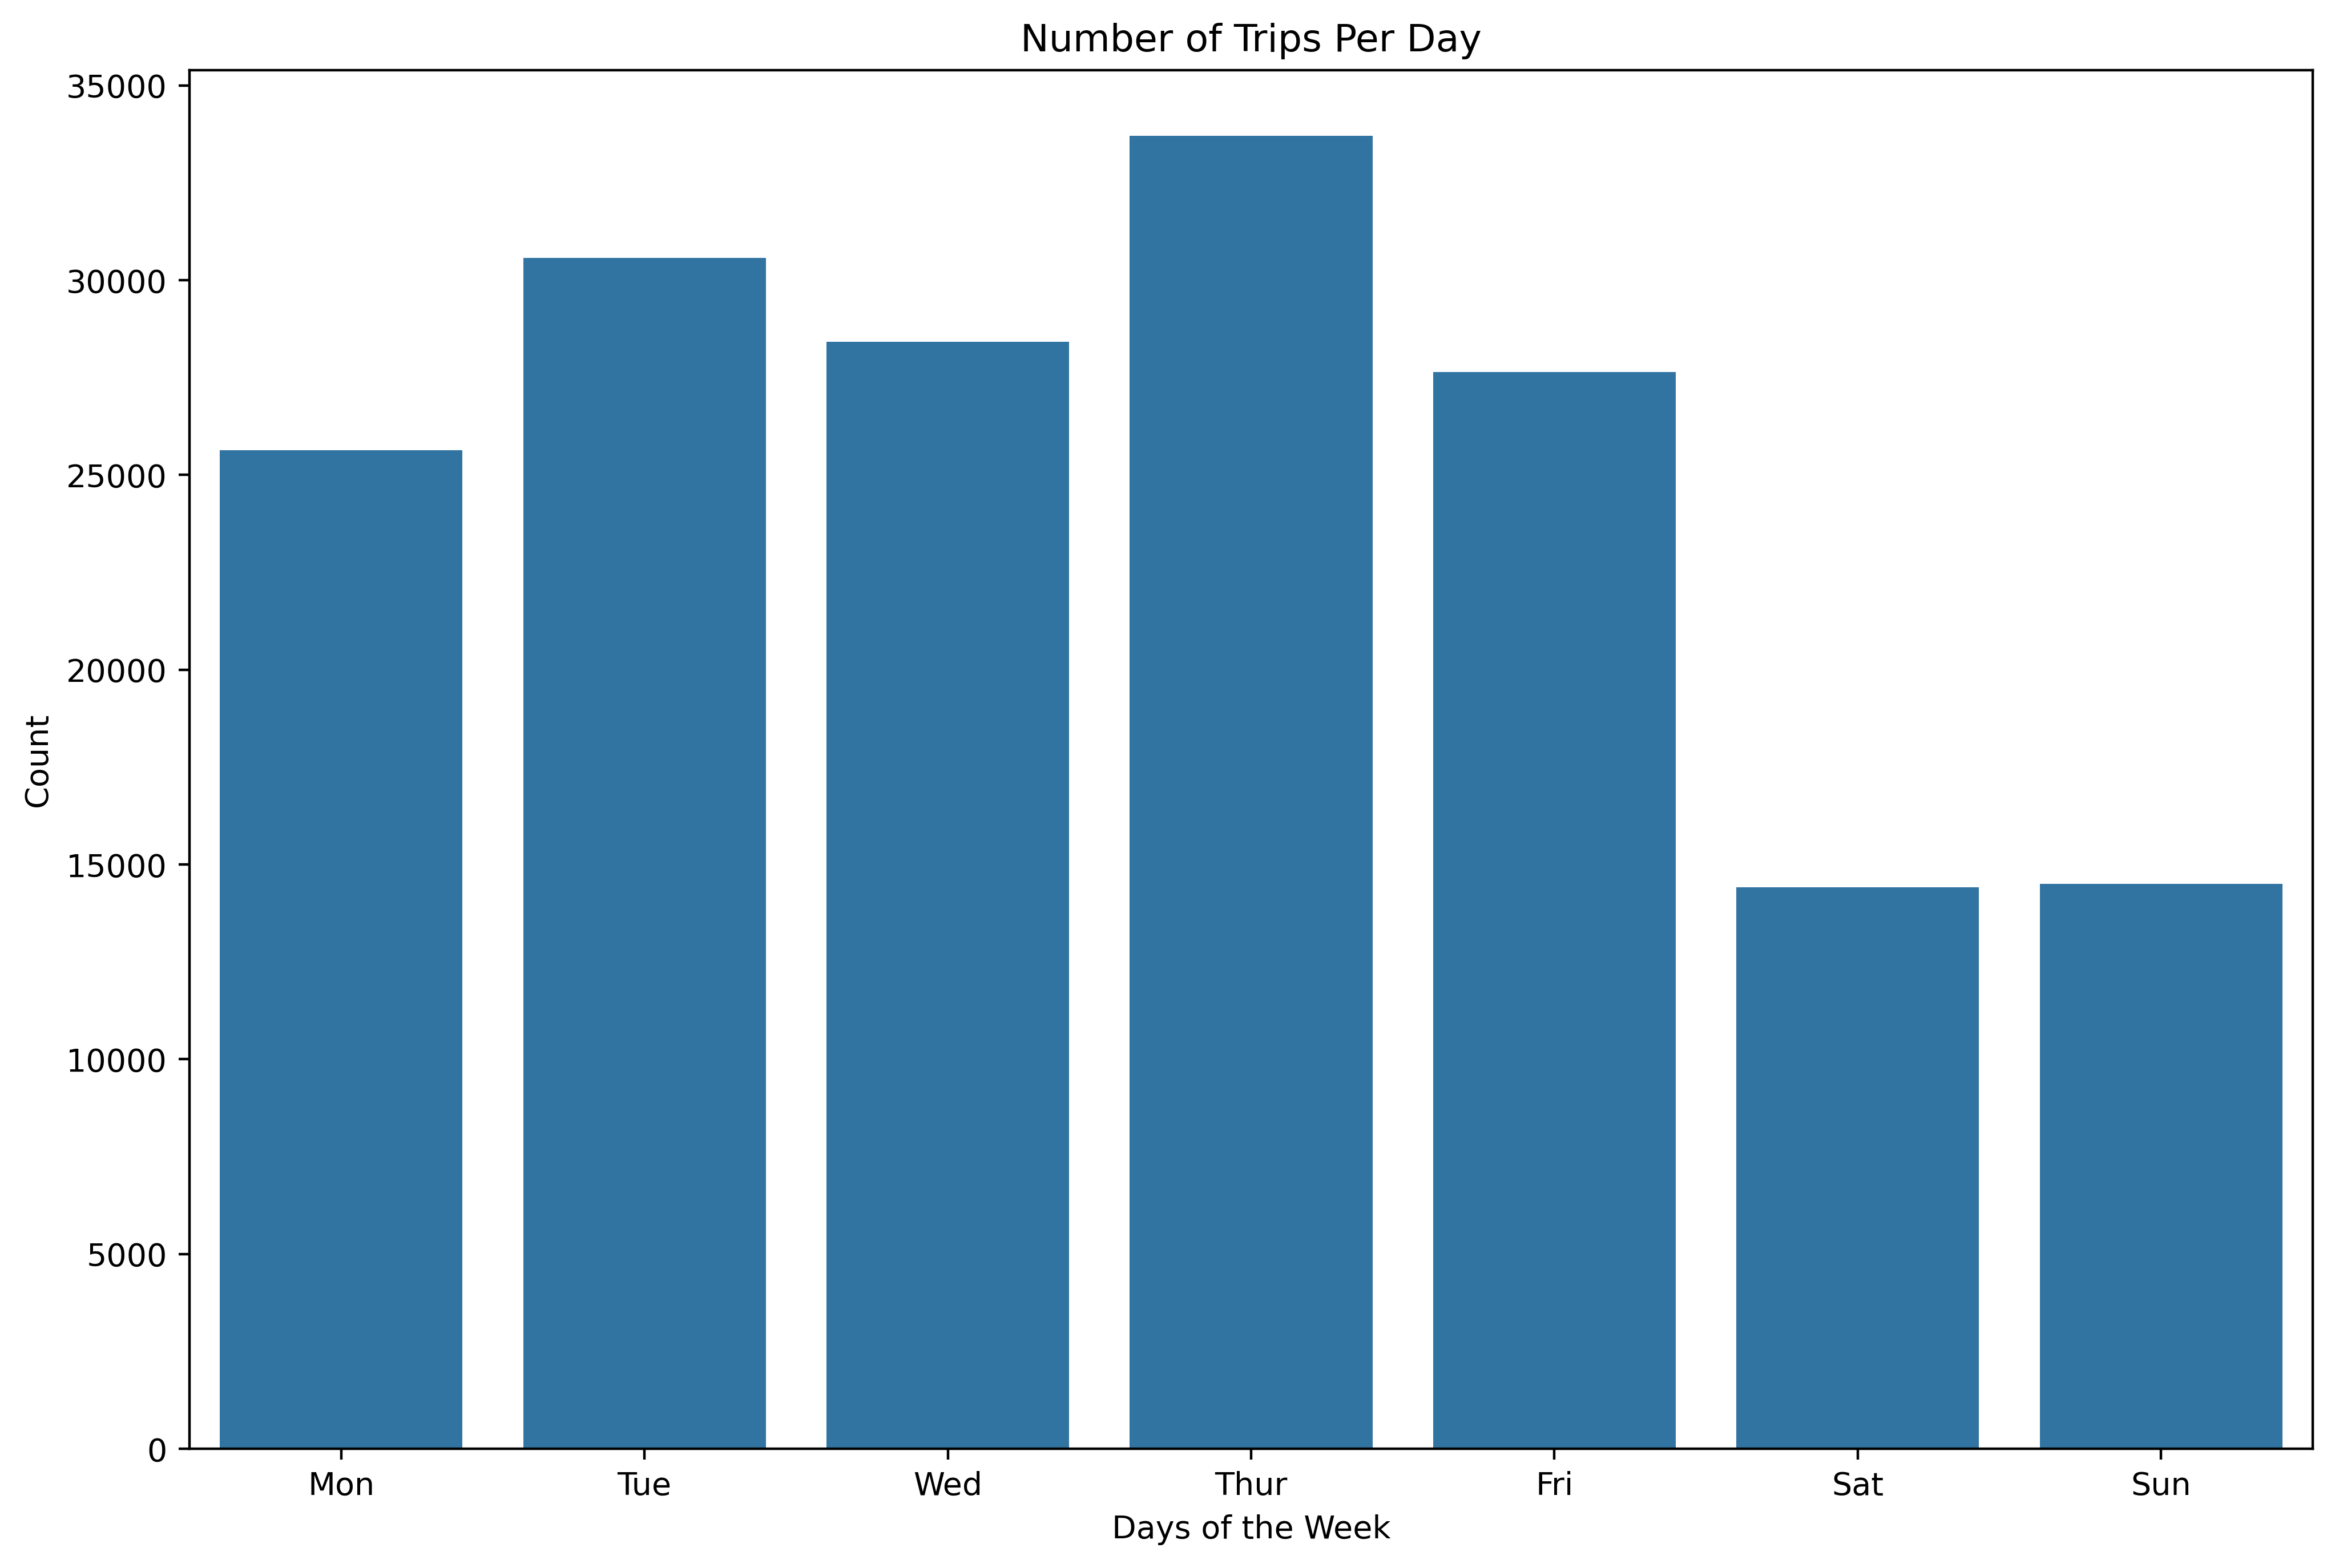

In [5]:
days = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']

base_color = sb.color_palette()[0] # Assigning the default color to a variable
sb.countplot(x = ride_data.start_time.dt.day_of_week, color=base_color)
plt.title("Number of Trips Per Day")
plt.xlabel("Days of the Week")
plt.ylabel('Count')
plt.xticks(np.arange(0,7), days);

## Trips Taken Per Hour
>The Busiest hours of the day in the morning are 8am and 9am, while in the evening, the busiest hours are 5pm and 6pm.<br>
The trend maybe due to the work arrangements of the working class where most people leave in the morning and return in the evening.


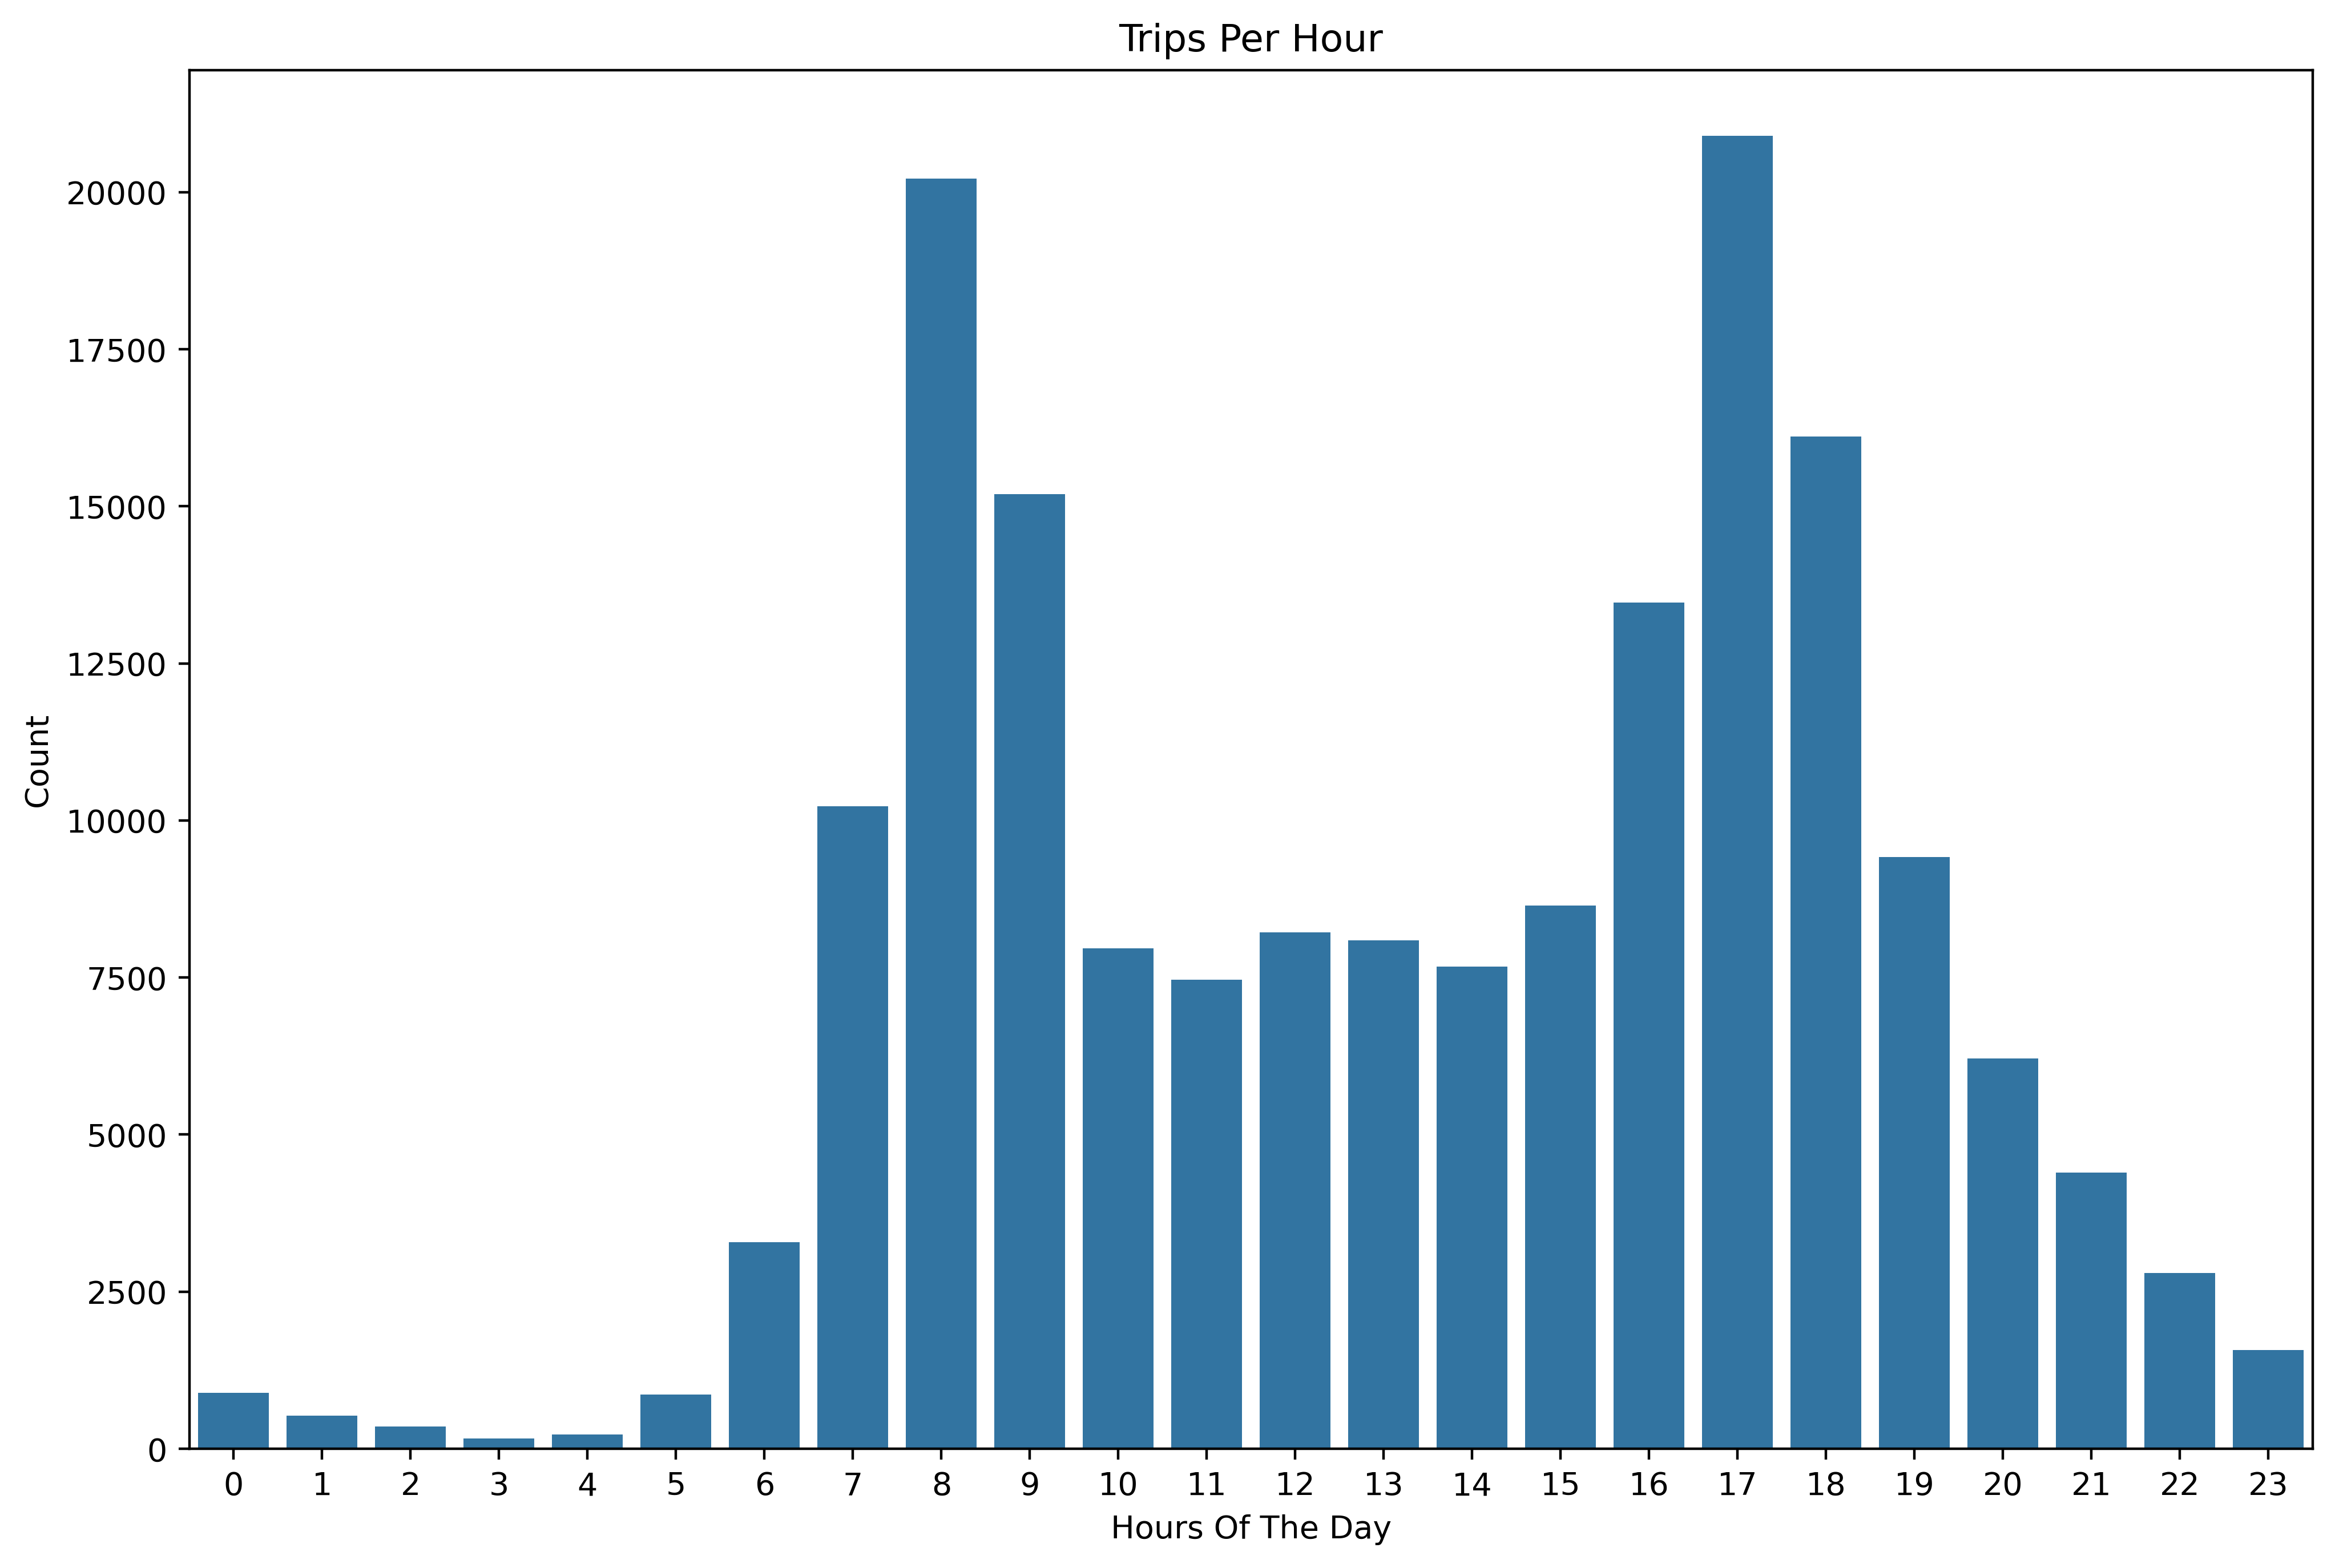

In [6]:
sb.countplot(x = ride_data.start_time.dt.hour, color=base_color)
plt.xlabel("Hours Of The Day")
plt.ylabel("Count")
plt.title("Trips Per Hour");

## Distribution Of Trips By User Type.
> There is a huge difference between the number of people who are subscribers and those who are not. It is clear to see that people generally are subcribers. The Subscriber riders took the most trips.

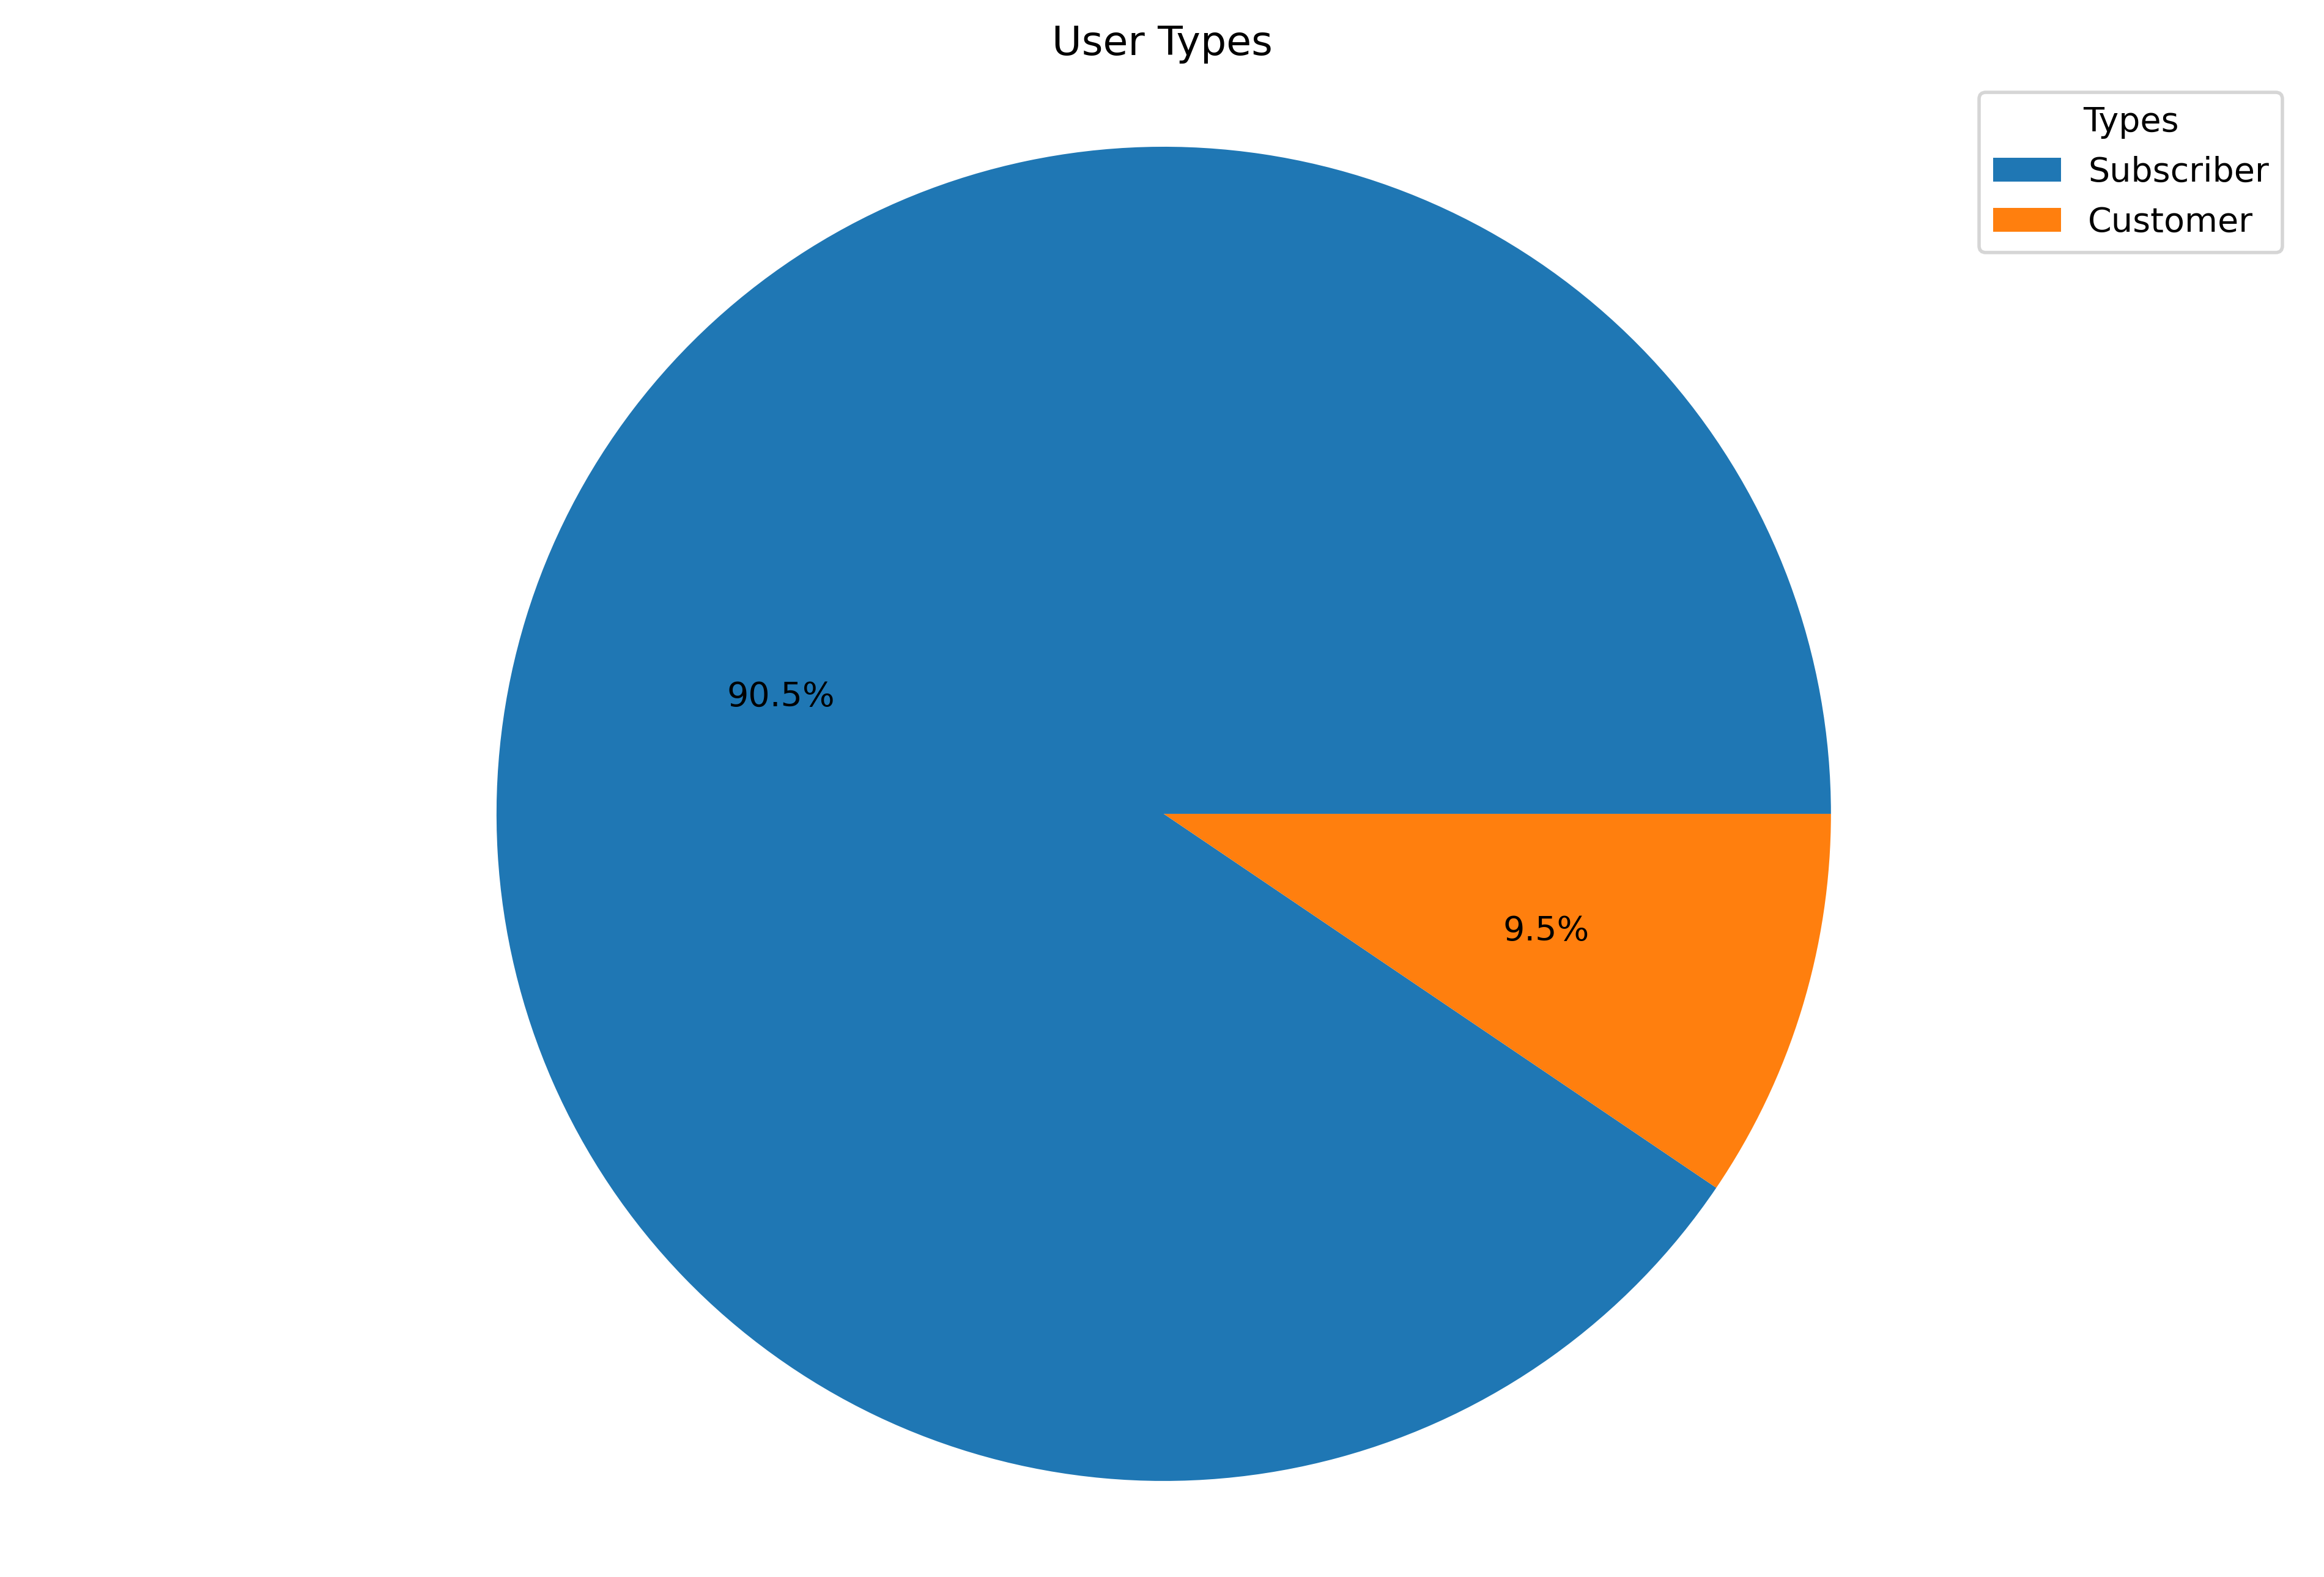

In [7]:
user = ride_data.user_type.value_counts()

plt.pie(x=user.values, autopct='%1.1f%%')
plt.axis('equal')
plt.title("User Types")
plt.legend(title='Types',labels=user.index);

## Average Trip Duration By User Type And Ride Shared
> Although there are more subscribers than customers, the customer riders trips take a longer duration than the subscribers. In addition to that it seems like ride sharing is a feature only available to the subscriber riders.

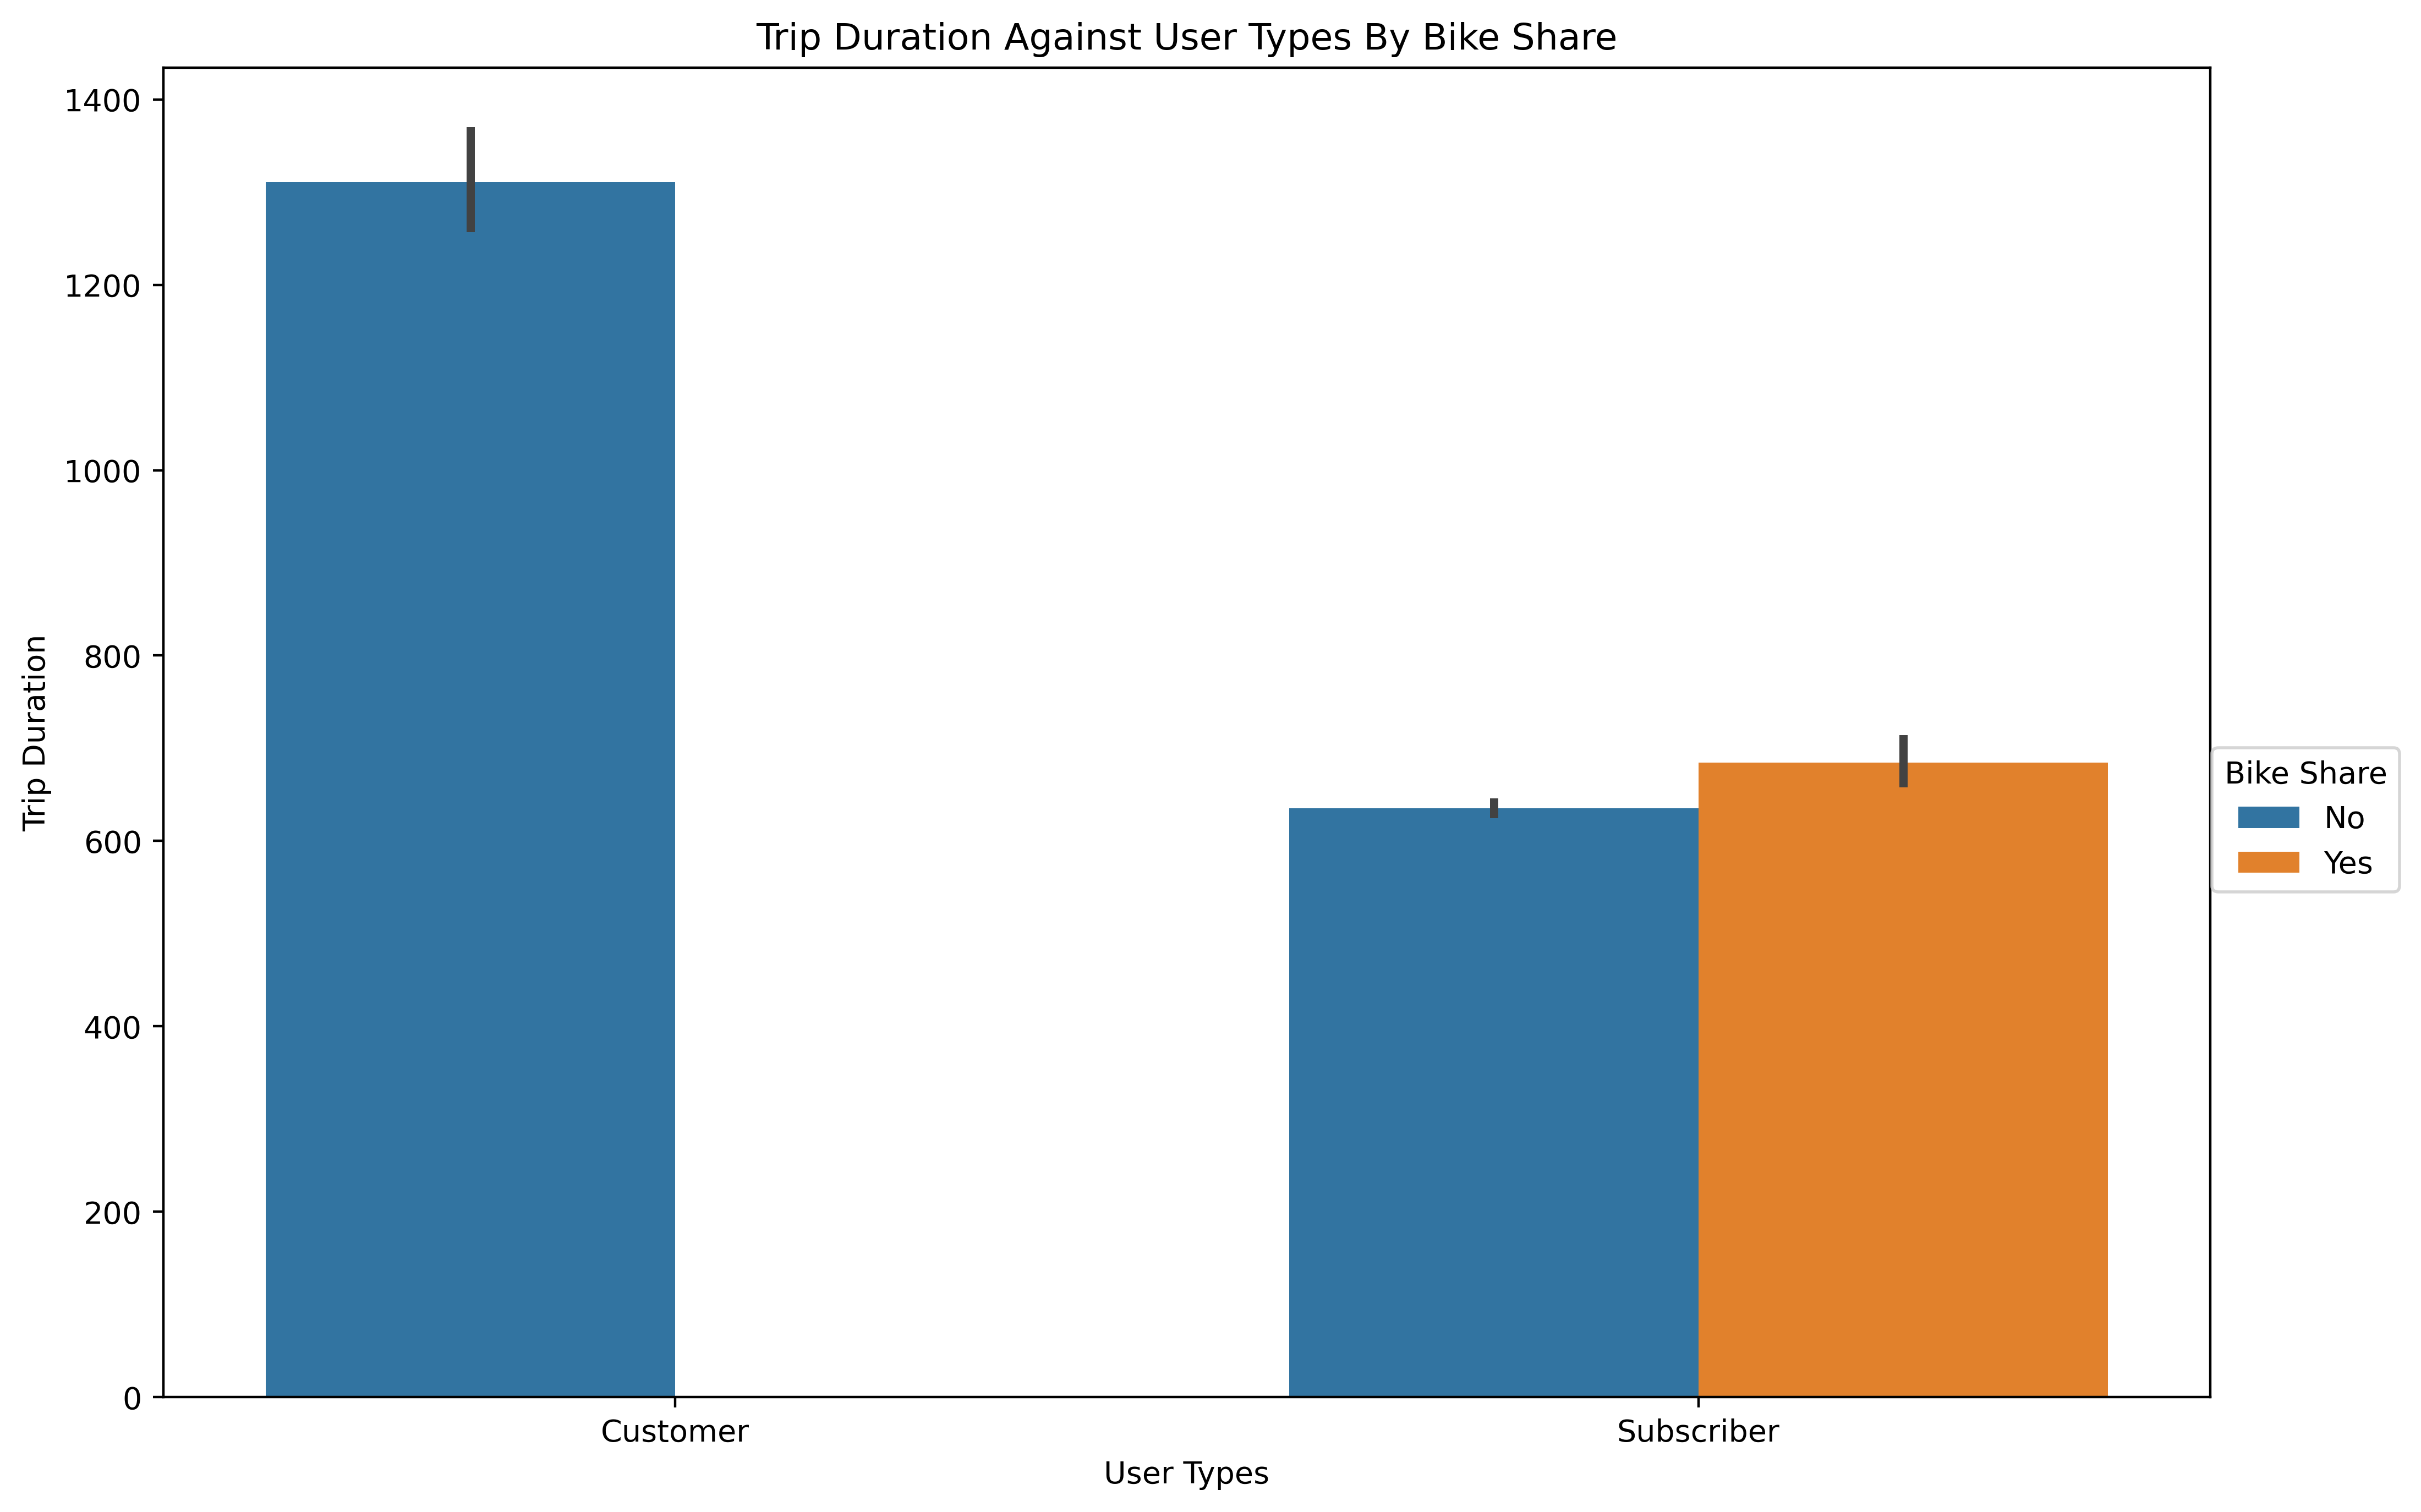

In [8]:
sb.barplot(x='user_type', y='duration_sec', hue='bike_share_for_all_trip', data=ride_data)
plt.legend(title='Bike Share', bbox_to_anchor=(1.1,0.5))
plt.xlabel("User Types")
plt.ylabel("Trip Duration")
plt.title("Trip Duration Against User Types By Bike Share");

## Average Trip Duration By User Type And Gender
>It can be observed that for both user types, the female riders had longer trip durations than the male riders. For the both user types, the other gender riders take longer trips than their counterparts.

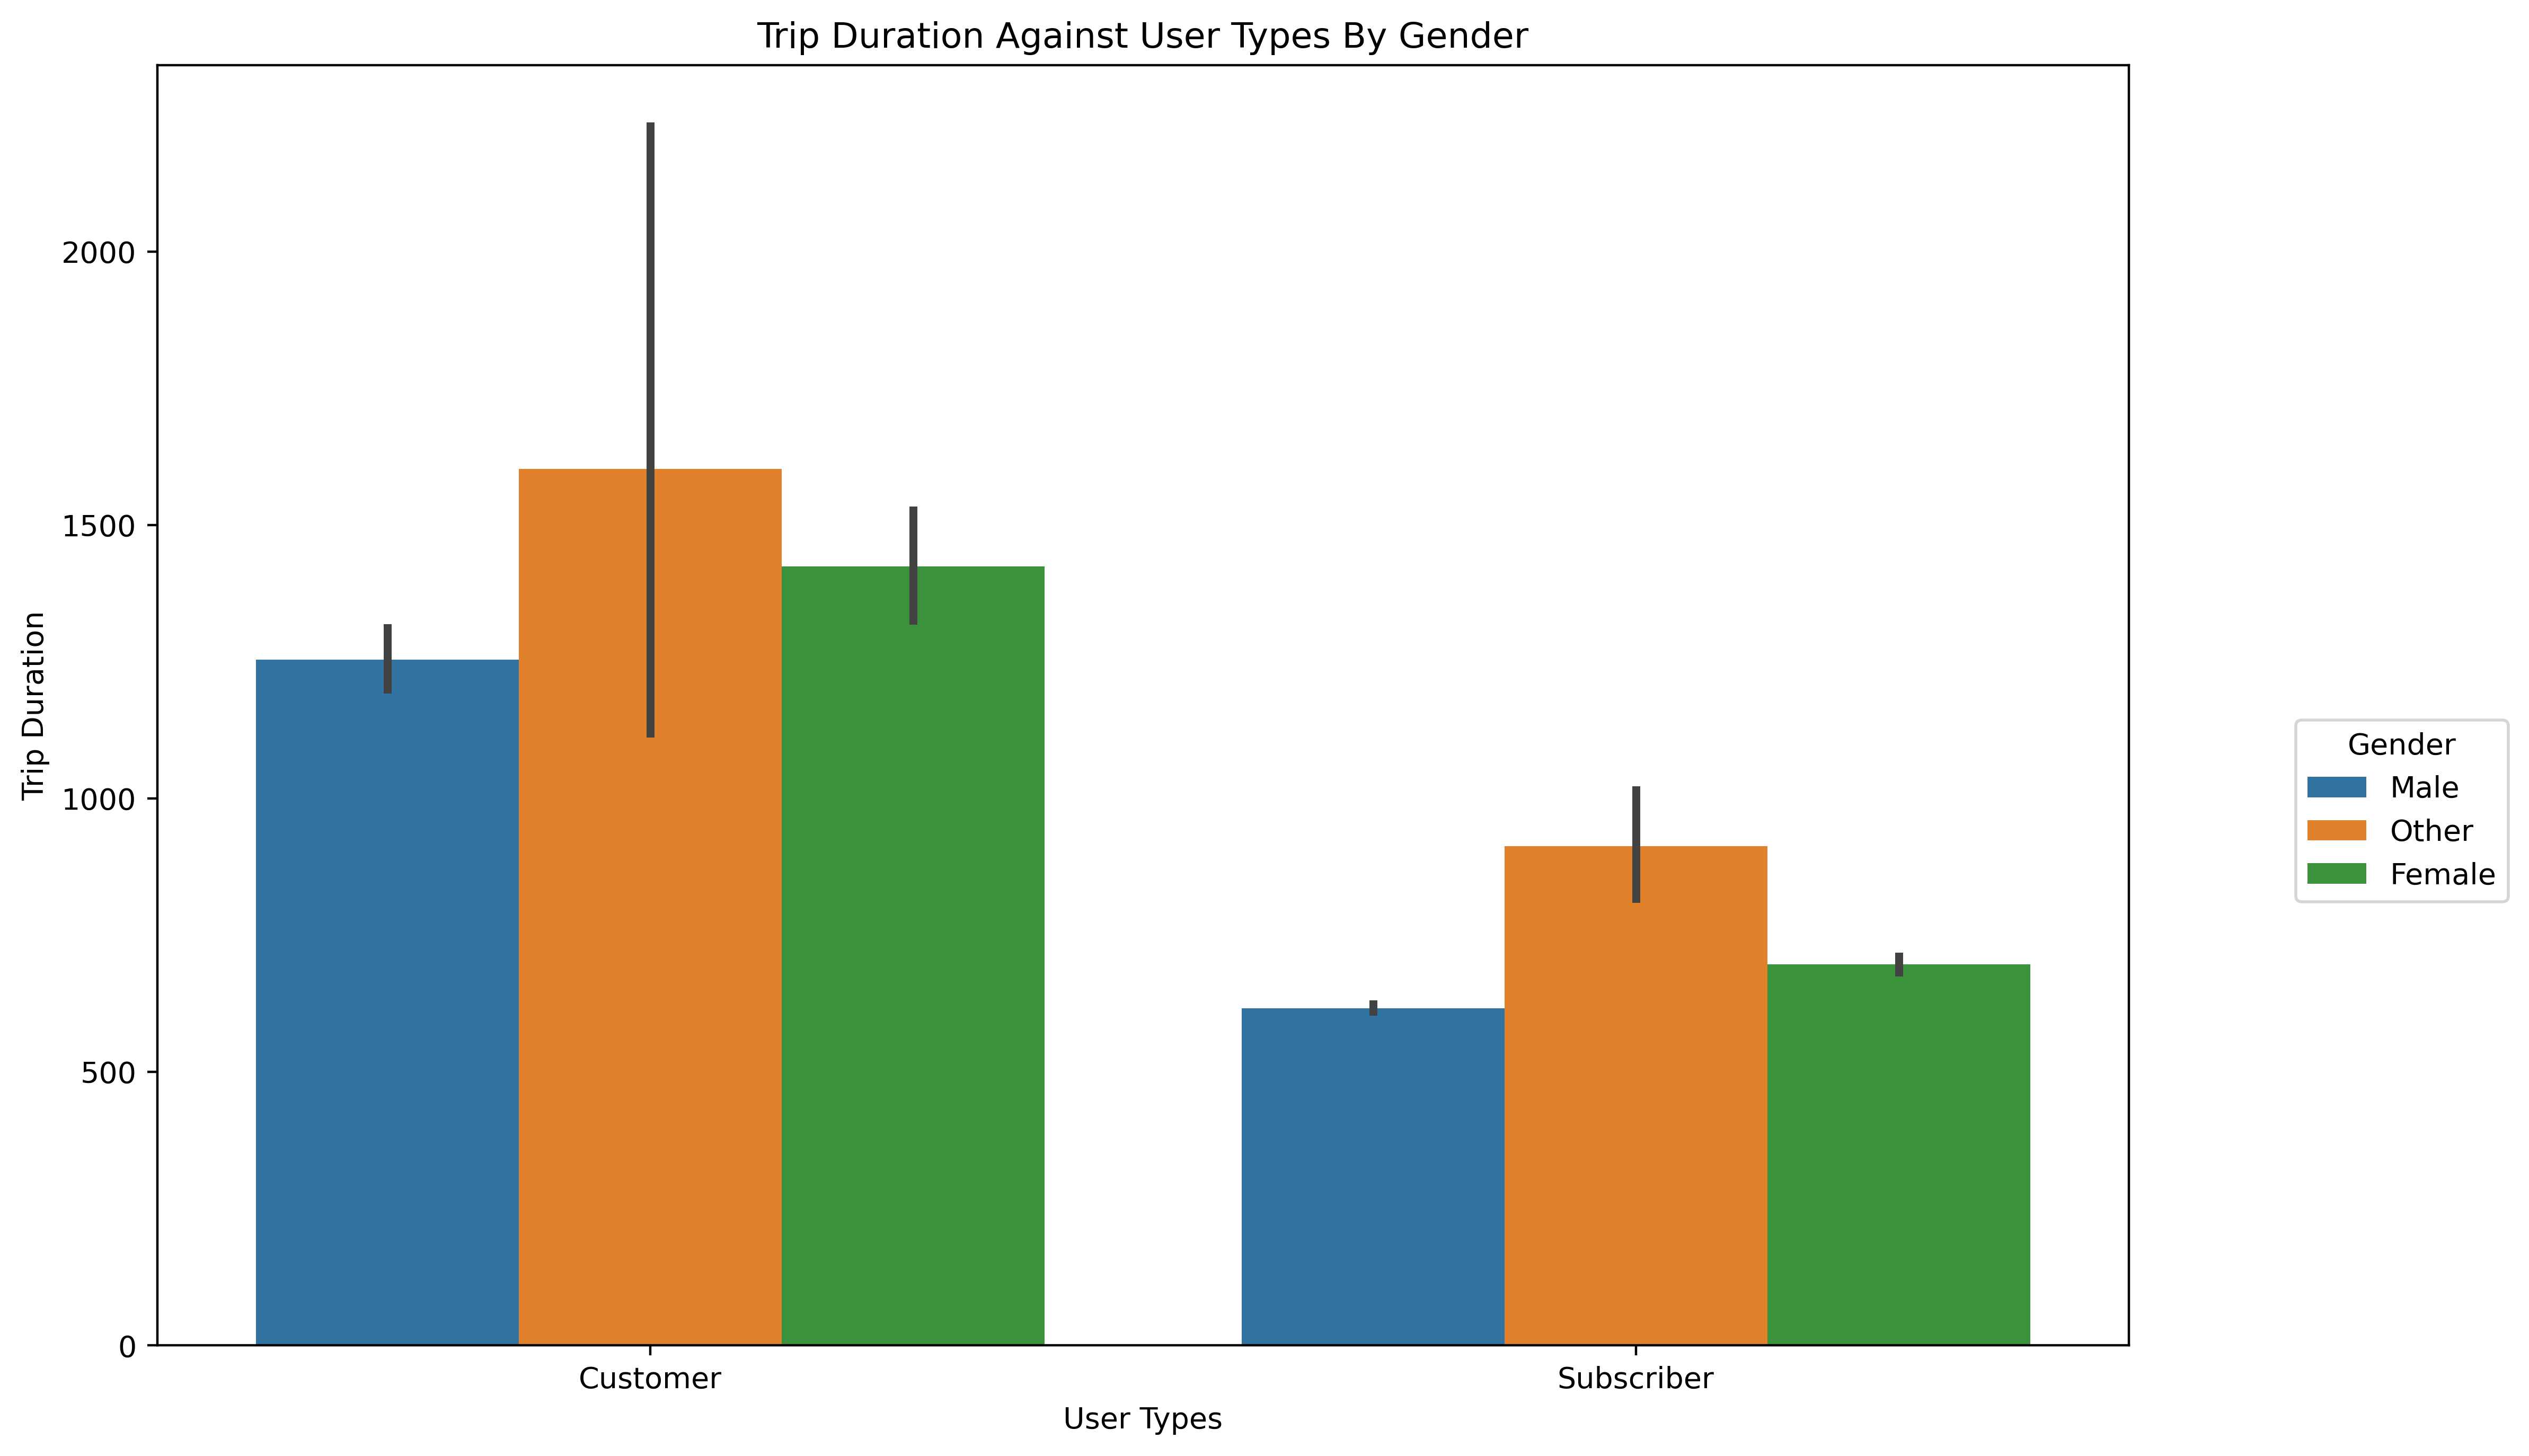

In [9]:
sb.barplot(x='user_type', y='duration_sec', hue='member_gender', data=ride_data)
plt.legend(title='Gender', bbox_to_anchor=(1.2,0.5))
plt.xlabel("User Types")
plt.ylabel("Trip Duration")
plt.title("Trip Duration Against User Types By Gender");

In [10]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

^C
